In [1]:
import pandas as pd

df = pd.read_csv("../data/Atlantic_Spain.csv")

df.head()


,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,is_explicit,album_cover_url
0,18-05-2024,1,Supernova,Saiko,84,190909,single,1,False,https://i.scdn.co/image/ab67616d0000b273c3f5b9...
1,18-05-2024,2,EL TONTO,Lola Indigo,83,187986,album,11,False,https://i.scdn.co/image/ab67616d0000b273daab36...
2,18-05-2024,3,Acróstico,Shakira,81,170785,single,1,False,https://i.scdn.co/image/ab67616d0000b273bd6bbd...
3,18-05-2024,4,BESO,ROSALÍA & Rauw Alejandro,96,194543,single,3,False,https://i.scdn.co/image/ab67616d0000b2734d6cf0...
4,18-05-2024,5,El Merengue,Marshmello & Manuel Turizo,91,189668,single,1,False,https://i.scdn.co/image/ab67616d0000b273f40467...


In [2]:
df.shape


(27800, 10)

In [3]:
df.columns

Index(['date', 'position', 'song', 'artist', 'popularity', 'duration_ms',
       'album_type', 'total_tracks', 'is_explicit', 'album_cover_url'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27800 entries, 0 to 27799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             27800 non-null  object
 1   position         27800 non-null  int64 
 2   song             27800 non-null  object
 3   artist           27800 non-null  object
 4   popularity       27800 non-null  int64 
 5   duration_ms      27800 non-null  int64 
 6   album_type       27800 non-null  object
 7   total_tracks     27800 non-null  int64 
 8   is_explicit      27800 non-null  bool  
 9   album_cover_url  27800 non-null  object
dtypes: bool(1), int64(4), object(5)
memory usage: 1.9+ MB


In [7]:
df['date'] = pd.to_datetime(df['date'])


In [9]:
df["song_id"] = df['song'] + "-" + df['artist']

In [10]:
df.groupby('date').size().value_counts()

50     554
100      1
Name: count, dtype: int64

In [16]:
df.groupby('date').size().reset_index(name='count').sort_values('count', ascending=False).head()


,date,count
287,2025-03-01,83
0,2024-05-18,50
1,2024-05-19,50
2,2024-05-20,50
3,2024-05-21,50


In [12]:
df = df.drop_duplicates(subset=['date','song','artist','position'])


In [13]:
df.groupby('date').size().value_counts()


50    554
83      1
Name: count, dtype: int64

In [17]:
df.groupby('date').size().reset_index(name='count').sort_values('count', ascending=False).head()


,date,count
287,2025-03-01,83
0,2024-05-18,50
1,2024-05-19,50
2,2024-05-20,50
3,2024-05-21,50


In [25]:
df[df['date'] == '2025-03-01']
df = df[df['position'] <= 50]


In [26]:
df.groupby('date').size().value_counts()


50    554
83      1
Name: count, dtype: int64

In [29]:
df = df.sort_values(['date', 'position'])



In [30]:
df = df.groupby('date').head(50)

In [31]:
df.groupby('date').size().value_counts()


50    555
Name: count, dtype: int64

In [32]:
lifecycle = df.groupby('song_id').agg(
    entry_date=('date', 'min'),
    exit_date=('date', 'max'),
    total_days=('date', 'nunique'),
    peak_rank=('position', 'min'),
    avg_rank=('position', 'mean')
).reset_index()


In [33]:
lifecycle.shape


(583, 6)

In [35]:
lifecycle.head(5)

,song_id,entry_date,exit_date,total_days,peak_rank,avg_rank
0,0 CONFIANZA-Rvfv,2025-06-02,2025-06-23,20,23,29.650000
1,"1 de Enero, Puntacana-Rels B",2025-04-28,2025-04-28,1,45,45.000000
2,1000COSAS-Lola Indigo & Manuel Turizo,2025-03-10,2025-11-13,245,3,20.428571
3,100xCiento-Foreign Teck & Eladio Carrion & De ...,2025-04-30,2025-05-15,11,13,28.181818
4,14 FEBREROS-Quevedo,2025-11-24,2025-11-27,4,9,13.500000


In [36]:
peak_day = df.loc[df.groupby('song_id')['position'].idxmin()]
peak_day = peak_day[['song_id','date']]
peak_day.columns = ['song_id','peak_date']


In [37]:
lifecycle = lifecycle.merge(peak_day, on='song_id')


In [38]:
lifecycle['days_to_peak'] = (lifecycle['peak_date'] - lifecycle['entry_date']).dt.days


In [39]:
lifecycle[['total_days','peak_rank','days_to_peak']].describe()


,total_days,peak_rank,days_to_peak
count,583.000000,583.000000,583.000000
mean,47.567753,21.919383,9.511149
std,72.669934,14.951537,29.861584
min,1.000000,1.000000,0.000000
25%,4.000000,9.000000,0.000000
50%,12.000000,20.000000,0.000000
75%,66.000000,35.000000,8.000000
max,537.000000,50.000000,426.000000


In [40]:
song_features = df.drop_duplicates('song_id')[[
    'song_id',
    'artist',
    'album_type',
    'is_explicit',
    'duration_ms',
    'total_tracks',
    'popularity'
]]

lifecycle = lifecycle.merge(song_features, on='song_id')


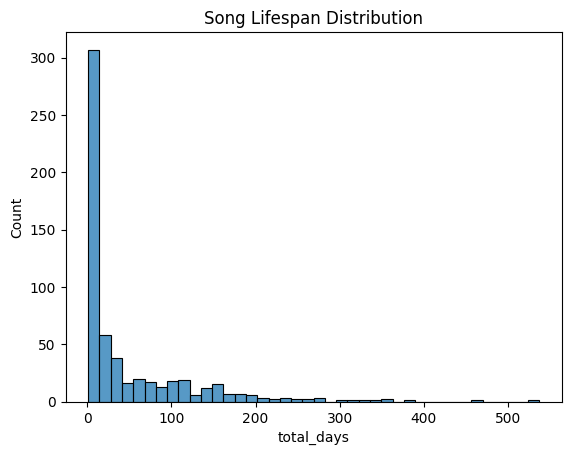

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(lifecycle['total_days'], bins=40)
plt.title("Song Lifespan Distribution")
plt.show()


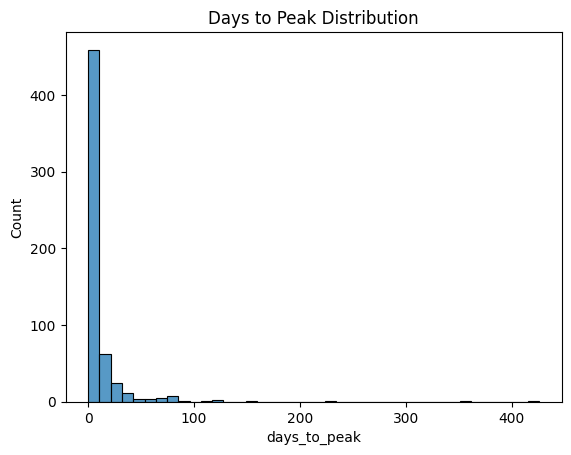

In [42]:
sns.histplot(lifecycle['days_to_peak'], bins=40)
plt.title("Days to Peak Distribution")
plt.show()


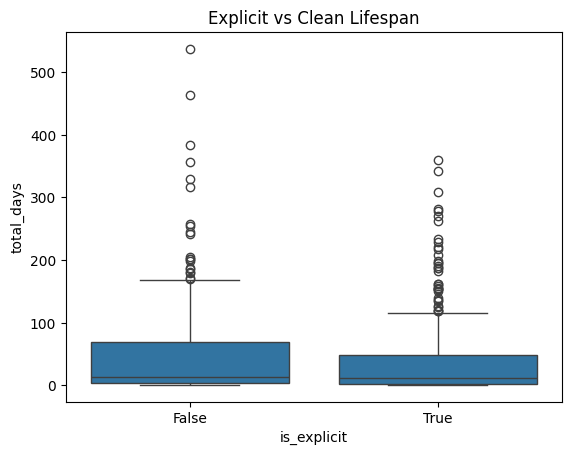

In [43]:
sns.boxplot(x='is_explicit', y='total_days', data=lifecycle)
plt.title("Explicit vs Clean Lifespan")
plt.show()


In [44]:
lifecycle.to_csv("../output/final_lifecycle_dataset.csv", index=False)


In [45]:
lifecycle.head(10)

,song_id,entry_date,exit_date,total_days,peak_rank,avg_rank,peak_date,days_to_peak,artist,album_type,is_explicit,duration_ms,total_tracks,popularity
0,0 CONFIANZA-Rvfv,2025-06-02,2025-06-23,20,23,29.650000,2025-06-07,5,Rvfv,album,False,217500,20,35
1,"1 de Enero, Puntacana-Rels B",2025-04-28,2025-04-28,1,45,45.000000,2025-04-28,0,Rels B,album,False,95000,13,65
2,1000COSAS-Lola Indigo & Manuel Turizo,2025-03-10,2025-11-13,245,3,20.428571,2025-03-10,0,Lola Indigo & Manuel Turizo,single,False,239482,1,65
3,100xCiento-Foreign Teck & Eladio Carrion & De ...,2025-04-30,2025-05-15,11,13,28.181818,2025-05-11,11,Foreign Teck & Eladio Carrion & De La Ghetto,single,True,219682,1,72
4,14 FEBREROS-Quevedo,2025-11-24,2025-11-27,4,9,13.500000,2025-11-24,0,Quevedo,album,True,172422,18,63
5,2AM-Sebastian Yatra & Bad Gyal,2025-11-24,2025-11-27,4,31,39.500000,2025-11-27,3,Sebastian Yatra & Bad Gyal,single,False,196426,1,55
6,2xLL-JC Reyes & YOVNGCHIMI & Slayter,2025-07-12,2025-08-09,26,35,40.769231,2025-07-23,11,JC Reyes & YOVNGCHIMI & Slayter,single,False,178909,1,61
7,3 CAÍDAS-SAIKO,2025-04-28,2025-05-05,8,13,30.750000,2025-04-28,0,SAIKO,album,False,251565,16,61
8,4 PREZ-Cruz Cafuné,2024-05-28,2024-05-29,2,35,40.500000,2024-05-28,0,Cruz Cafuné,album,True,149484,23,53
9,4TO 23-Aitana,2025-07-07,2025-07-16,9,17,35.000000,2025-07-07,0,Aitana,single,False,168320,1,58


In [46]:
lifecycle.shape


(583, 14)

In [47]:
df = df.sort_values(['date','position'])


In [48]:
df['prev_date'] = df['date'].shift(50)
df['prev_song'] = df['song_id'].shift(50)

entries = []

dates = sorted(df['date'].unique())

for i in range(1, len(dates)):
    today = set(df[df['date'] == dates[i]]['song_id'])
    yesterday = set(df[df['date'] == dates[i-1]]['song_id'])
    
    new_entries = today - yesterday
    entries.append(len(new_entries))

import numpy as np
avg_daily_entries = np.mean(entries)
avg_daily_entries


np.float64(1.7581227436823104)

In [49]:
lifecycle['total_days'].mean()


np.float64(47.56775300171527)

In [50]:
lifecycle['days_to_peak'].mean()


np.float64(9.51114922813036)

In [51]:
lifecycle.groupby('is_explicit')['total_days'].mean()


is_explicit
False    49.620061
True     44.909449
Name: total_days, dtype: float64

In [52]:
lifecycle.groupby('album_type')['total_days'].mean()


album_type
album     38.030717
single    57.203448
Name: total_days, dtype: float64

In [53]:
def classify_lifecycle(days):
    if days <= 10:
        return "Short Hit"
    elif days <= 50:
        return "Medium Run"
    elif days <= 150:
        return "Long Runner"
    else:
        return "Evergreen"

lifecycle['lifecycle_type'] = lifecycle['total_days'].apply(classify_lifecycle)


In [54]:
lifecycle['lifecycle_type'].value_counts()


lifecycle_type
Short Hit      270
Medium Run     147
Long Runner    108
Evergreen       58
Name: count, dtype: int64

In [55]:
pd.crosstab(lifecycle['album_type'], lifecycle['lifecycle_type'])


lifecycle_type,Evergreen,Long Runner,Medium Run,Short Hit
album_type,,,,
album,24,37,61,171
single,34,71,86,99


In [56]:
pd.crosstab(lifecycle['is_explicit'], lifecycle['lifecycle_type'])


lifecycle_type,Evergreen,Long Runner,Medium Run,Short Hit
is_explicit,,,,
False,32,71,73,153
True,26,37,74,117


In [57]:
lifecycle.to_csv("../output/final_lifecycle_dataset.csv", index=False)


In [58]:
lifecycle['lifecycle_type'].value_counts()


lifecycle_type
Short Hit      270
Medium Run     147
Long Runner    108
Evergreen       58
Name: count, dtype: int64

In [59]:
daily_entries = []

dates = sorted(df['date'].unique())

for i in range(1, len(dates)):
    today = set(df[df['date'] == dates[i]]['song_id'])
    yesterday = set(df[df['date'] == dates[i-1]]['song_id'])
    
    new_entries = today - yesterday
    daily_entries.append(len(new_entries))


In [60]:
import numpy as np

avg_entries = np.mean(daily_entries)
std_entries = np.std(daily_entries)

avg_entries, std_entries


(np.float64(1.7581227436823104), np.float64(2.6339865763843555))

In [61]:
entry_df = pd.DataFrame({
    'date': dates[1:],
    'daily_new_entries': daily_entries
})


In [63]:
entry_df.to_csv("../output/daily_entry_trend.csv", index=False)
